In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# !rm -rf saved_lifter_2d_3d_model/synthetic_cabin_bw/A_Pillar_Codriver/prediction/linear_model/lightning_logs

In [3]:
import pandas as pd
import numpy as np
import torch
import lightning.pytorch as pl
import matplotlib.pyplot as plt
# import plotly
import plotly.express as px

In [4]:
import os
import torch
import pandas as pd
import numpy as np
import pytorch_lightning as pl
from pytorch_lightning.callbacks import ModelCheckpoint
from pytorch_lightning.callbacks.early_stopping import EarlyStopping
from torch.nn import functional as F
from torch.utils.data import DataLoader, random_split
from modules.lifter_2d_3d.model.linear_model.network.linear_model import BaselineModel
from modules.lifter_2d_3d.dataset.drive_and_act_keypoint_dataset import DriveAndActKeypointDataset
from modules.lifter_2d_3d.model.repnet.lit_repnet import LitRepNet
from modules.utils.visualization import generate_connection_line, get_sample_from_loader, visualize_pose
from IPython.display import display
from experiments.experiment_config import (
    DRIVE_AND_ACT_VIEWPOINTS,
    get_drive_and_act_loaders,
)
pl.seed_everything(1234)

view_point = DRIVE_AND_ACT_VIEWPOINTS[2]
constructed_loader = get_drive_and_act_loaders(view_point, subset_percentage=100)
train_loader = constructed_loader['train_loader']
val_loader = constructed_loader['val_loader']
test_loader = constructed_loader['test_loader']
print(
    'train_dataset', len(train_loader.dataset),
    'val_dataset', len(val_loader.dataset),
    'test_dataset', len(test_loader.dataset)
)
model_checkpoint = ModelCheckpoint(monitor='mpjpe',mode='min', save_top_k=1)
early_stopping = EarlyStopping(monitor='mpjpe', mode="min", patience=5)

# ------------
# model
# ------------
lifter_2D_3D = BaselineModel(exclude_ankle=True, exclude_knee=True)
lit_model = LitRepNet(lifter_2D_3D=lifter_2D_3D)
# ------------
# training
# ------------
# saved_model_path = './saved_lifter_2d_3d_model/synthetic_cabin_bw/A_Pillar_Codriver/prediction/repnet_linear_model/'
saved_model_path = f'./saved_lifter_2d_3d_model/rq3/repnet/drive_and_act/{view_point}'
if not os.path.exists(saved_model_path):
    os.makedirs(saved_model_path)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('device', device)
# device = 'cpu'
trainer = pl.Trainer(
    # max_steps=10,
    max_epochs=100,
    callbacks=[model_checkpoint, early_stopping],
    accelerator=device,
    check_val_every_n_epoch=5,
    default_root_dir=saved_model_path,
    reload_dataloaders_every_n_epochs=1,
    # gradient_clip_val=1.0
)
trainer.fit(lit_model, train_loader, val_loader)

Global seed set to 1234
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


train_dataset 22507 val_dataset 6158 test_dataset 10959
device cuda


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type               | Params
-----------------------------------------------------
0 | lifter_2D_3D  | BaselineModel      | 4.3 M 
1 | camera_net    | CameraNet          | 4.0 M 
2 | generator     | RepNet             | 8.3 M 
3 | discriminator | DiscriminatorModel | 89.2 K
-----------------------------------------------------
8.4 M     Trainable params
0         Non-trainable params
8.4 M     Total params
33.650    Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

check #0
val MPJPE from: 128 samples : 2424.989700317383
val P-MPJPE from: 128 samples : 2256.999653445604


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

check #1
training loss from 1755 batches:
d_loss = 4.306510898598239
g_loss = -0.2955186712563547
c_loss = 1.7004118783521516
pose_2d_loss = 43.78805535933231
total_g_loss = 45.1929485331913
val MPJPE from: 6158 samples : 591.9376611709595
val P-MPJPE from: 6158 samples : 483.1302617917767


Validation: 0it [00:00, ?it/s]

check #2
training loss from 1755 batches:
d_loss = 1.9899509591424567
g_loss = -0.2603109452544454
c_loss = 1.6977945501648124
pose_2d_loss = 4.122077746642621
total_g_loss = 5.559561353531318
val MPJPE from: 6158 samples : 558.3897829055786
val P-MPJPE from: 6158 samples : 439.7610196470771


Validation: 0it [00:00, ?it/s]

check #3
training loss from 1755 batches:
d_loss = 0.7129305717272636
g_loss = -0.34321015250479053
c_loss = 1.498229652829999
pose_2d_loss = 0.808956949884056
total_g_loss = 1.963976449674351
val MPJPE from: 6158 samples : 480.9989035129547
val P-MPJPE from: 6158 samples : 359.5377561457133


Validation: 0it [00:00, ?it/s]

check #4
training loss from 1755 batches:
d_loss = 4.33308827746288
g_loss = -0.5718701095598885
c_loss = 0.46066757848969214
pose_2d_loss = 0.40143895622162395
total_g_loss = 0.2902364251026061
val MPJPE from: 6158 samples : 213.67038786411285
val P-MPJPE from: 6158 samples : 145.49464010363477


Validation: 0it [00:00, ?it/s]

check #5
training loss from 1755 batches:
d_loss = 1.3939559825635024
g_loss = -0.6585325251192788
c_loss = 0.1527098844406272
pose_2d_loss = 0.22685666115705105
total_g_loss = -0.2789659790843301
val MPJPE from: 6158 samples : 190.7545030117035
val P-MPJPE from: 6158 samples : 149.55338739661576


Validation: 0it [00:00, ?it/s]

check #6
training loss from 1755 batches:
d_loss = 2.355006944538861
g_loss = -0.712075936696638
c_loss = 0.10590720161413535
pose_2d_loss = 0.17731345526958972
total_g_loss = -0.4288552807267235
val MPJPE from: 6158 samples : 437.1641278266907
val P-MPJPE from: 6158 samples : 266.46090878056543
current learning rate: [9.5e-05] [9.5e-05]
current learning rate: [9.025e-05] [9.025e-05]
current learning rate: [8.573749999999999e-05] [8.573749999999999e-05]


Validation: 0it [00:00, ?it/s]

check #7
training loss from 1755 batches:
d_loss = 0.6931759464350181
g_loss = -0.4700143156992404
c_loss = 0.08345797436890269
pose_2d_loss = 0.15765308883370158
total_g_loss = -0.22890325323638752
val MPJPE from: 6158 samples : 301.70658230781555
val P-MPJPE from: 6158 samples : 220.0383815410968
current learning rate: [8.145062499999998e-05] [8.145062499999998e-05]
current learning rate: [7.737809374999998e-05] [7.737809374999998e-05]
current learning rate: [7.350918906249998e-05] [7.350918906249998e-05]
current learning rate: [6.983372960937497e-05] [6.983372960937497e-05]
current learning rate: [6.634204312890622e-05] [6.634204312890622e-05]


Validation: 0it [00:00, ?it/s]

check #8
training loss from 1755 batches:
d_loss = 0.6291227585697106
g_loss = -0.7611405087162626
c_loss = 0.06725708775094941
pose_2d_loss = 0.15444095047174866
total_g_loss = -0.5394424710348461
val MPJPE from: 6158 samples : 500.5747079849243
val P-MPJPE from: 6158 samples : 470.2519097495418
current learning rate: [6.30249409724609e-05] [6.30249409724609e-05]
current learning rate: [5.987369392383786e-05] [5.987369392383786e-05]
current learning rate: [5.688000922764596e-05] [5.688000922764596e-05]
current learning rate: [5.4036008766263664e-05] [5.4036008766263664e-05]
current learning rate: [5.133420832795048e-05] [5.133420832795048e-05]


Validation: 0it [00:00, ?it/s]

check #9
training loss from 1755 batches:
d_loss = 0.5857198046398299
g_loss = -0.7346823767379478
c_loss = 0.07120315380861447
pose_2d_loss = 0.16998159040582825
total_g_loss = -0.4934976330085358
val MPJPE from: 6158 samples : 295.1754927635193
val P-MPJPE from: 6158 samples : 245.7234695790515
current learning rate: [4.876749791155295e-05] [4.876749791155295e-05]
current learning rate: [4.6329123015975305e-05] [4.6329123015975305e-05]
current learning rate: [4.4012666865176535e-05] [4.4012666865176535e-05]
current learning rate: [4.181203352191771e-05] [4.181203352191771e-05]
current learning rate: [3.972143184582182e-05] [3.972143184582182e-05]


Validation: 0it [00:00, ?it/s]

check #10
training loss from 1755 batches:
d_loss = 0.5594527086556128
g_loss = -0.7205052552569625
c_loss = 0.06510820604351342
pose_2d_loss = 0.17456913592129353
total_g_loss = -0.4808279122637208
val MPJPE from: 6158 samples : 477.9513478279114
val P-MPJPE from: 6158 samples : 219.14004808461664
current learning rate: [3.7735360253530726e-05] [3.7735360253530726e-05]


In [5]:
best_checkpoint_path = model_checkpoint.best_model_path
trainer.test(ckpt_path=best_checkpoint_path, dataloaders=test_loader)

Restoring states from the checkpoint path at saved_lifter_2d_3d_model/rq3/repnet/drive_and_act/inner_mirror/lightning_logs/version_3/checkpoints/epoch=24-step=17550.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at saved_lifter_2d_3d_model/rq3/repnet/drive_and_act/inner_mirror/lightning_logs/version_3/checkpoints/epoch=24-step=17550.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│           mpjpe           │    185.57345867156982     │
│          p_mpjpe          │    154.84018006088291     │
└───────────────────────────┴───────────────────────────┘

[{'mpjpe': 185.57345867156982, 'p_mpjpe': 154.84018006088291}]

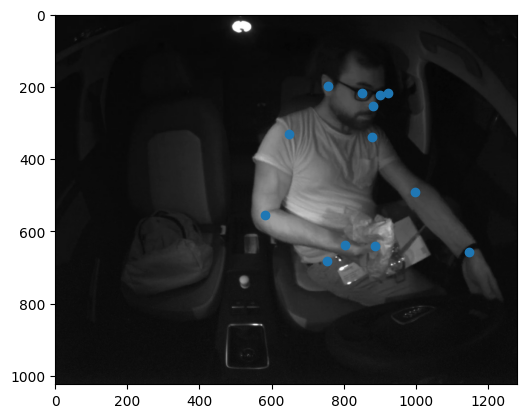

In [10]:
img = plt.imread(f'/root/data/processed/drive_and_act/inner_mirror/images/train/{item["filenames"]}')
fig, ax = plt.subplots()
ax.imshow(img)

ax.scatter(item['pose_2d'][:,0] * item['scale_factor'][0] + item['root_2d'][0], item['pose_2d'][:,1] * item['scale_factor'][1] + item['root_2d'][1])

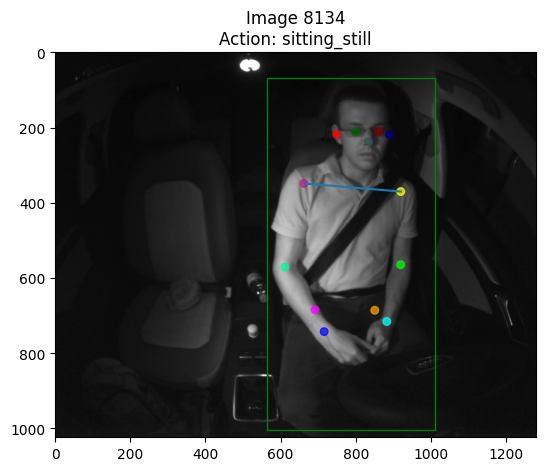

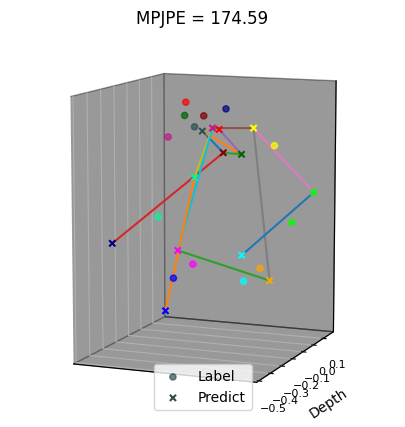

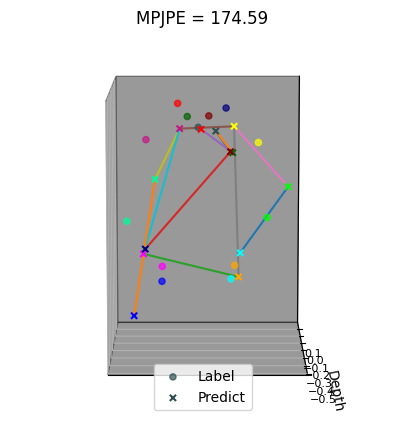

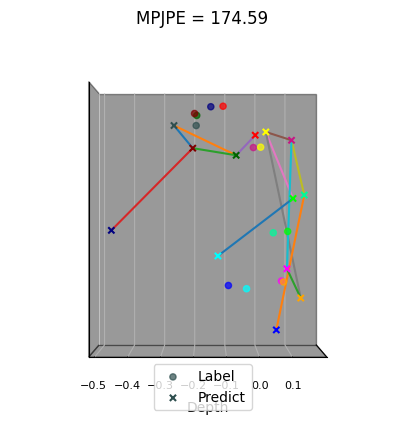

In [14]:
from pathlib import Path
view_point = 'inner_mirror'
from modules.utils.visualization import (
    plot_samples
)

plot_samples(
    Path(f'/root/data/processed/drive_and_act/') / view_point,
    lit_model,
    test_loader,
    'train',
    img_figsize=(20/2, 10/2),
    plot_figsize=(20.5/2, 10/2),
    sample_indices=[500],
    # sample_indices=[500],
    is_plot_gt_skeleton=False
)